## 차원축소

매우 많은 feature로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것이다. 차원이 증가할수록 데이터 간의 거리가 기하급수적으로 증가하기 때문에 희소한 구조를 가지게 되고 모델의 예측 신뢰도가 떨어지게 된다. 학습 데이터의 크기가 줄어서 학습에 필요한 처리 능력도 줄일 수 있다.<br>

희소하다=spare<br>
spare data와 dense data:
차원/전체 공간에 비해 데이터가 있는 공간이 협소하거나 빽빽하게 차 있는 데이터를 의미한다.


차원 축소 <br>

차원이 무엇인가? 차원은 변수 feature이다.<br>
차원 축소는 변수를 줄여나가는 것을 의미한다.<br>
차원이 커질 수록 데이터 포인트간의 거리가 커져 spare하다.<br>
변수가 너무 많은 경우, 변수들이 유사한 경우가 많다. 다중 공선성<br>
스피어만 고전/국어/프랑스어/수학/물리가 유사한 상관 관계가 높다.<br>
언어지능: 고전/국어/프랑스어  
수리지능: 수학/물리  
언어지능과 수리지능의 상관관계는?

feature 선택과 feature 추출이 있다.
feature 선택은 데이터 특징을 잘 나타내는 주요 피처만 선택하는 것이고, 기존의 피처들이 압축된 것이다.  
feature 추출은 기존 피처를 단순 압축이 아닌 피처를 함축적으로 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것이다.

데이터를 단순하게 압축하는 것뿐만 아니라 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는데 있다. 책에서 든 예시는 함축적인 의미를 쉽게 인지할 수 있지만, 심리학 연구를 예를 들면 추상적인 피처들 IQ, 행복, 성격과 같은 피처들의 잠재적인 요소를 추출하는 것은 쉽지 않고, PCA, SVD, NMF를 통해 잠재적인 의미를 찾아낼 수 있습니다.

이미지 데이터의 잠재적 특성을 도출해 이미지 변환고 압축을 수행하여 예측성능을 향상시키거나 텍스트 문서의 시맨틱 토픽 모델링을 통해 문서 내 숨겨진 의미나 의도를 추출 가능하다.  
**주성분 분석과 요인분석**

**차원축소의 단점**
- 만능이 아니다.
- 설명 불가능하거나 연구자의 의도대로 결과를 조절 가능하다.
- 정보의 손실이 발생(분산이 변화한다.)
- 직관적인 이해가 불가능하다.

### PCA의 개요

PCA는 가장 대표적인 차원 축소 기법이다.
여러 변수 간에 존재하는 **상관관계**를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법이다.
기존데이터의 정보 유실을 최소화시킨다.
높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다.

- 높은 분산을 가져야 데이터를 **투영(projection)** 시켰을 때 **유실** 이 작다.
- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소시킨다.
- principal component: 가장 높은 분산을 가지는 축
- 세 개의 축을 생성한다. 축에서부터 점까지 수직거리들의 합. mean square error가 가장 작은 축을 찾는다.
- 첫 번째 벡터 축: 가장 큰 데이터 **변동성**을 가진다.
- 두 번째 벡터 축: 첫 번째 벡터 축에 수직하다.
- 세 번째 벡터 축: 두 번째 축과 직각이 되는 벡터이다.

대칭행렬은 항상 고유벡터를 직교행렬로, 고유값을 정방행렬로 대각화할 수 있다는 것이다.
$$ C=P\sum P^T $$

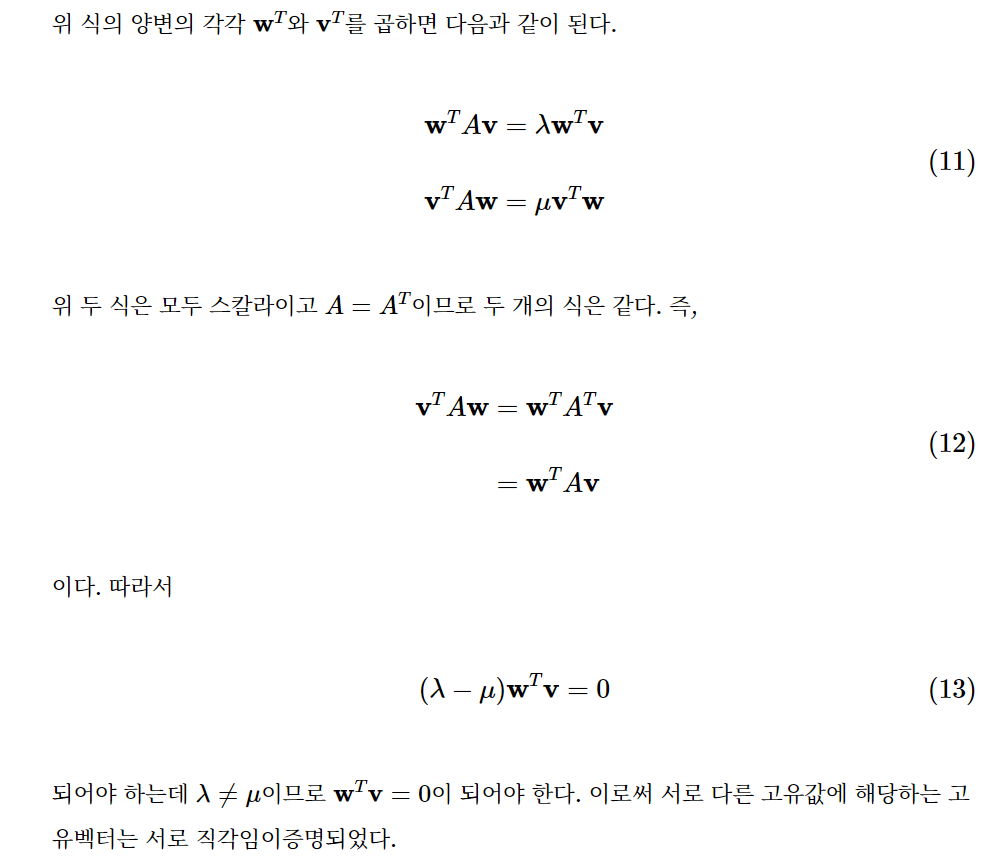

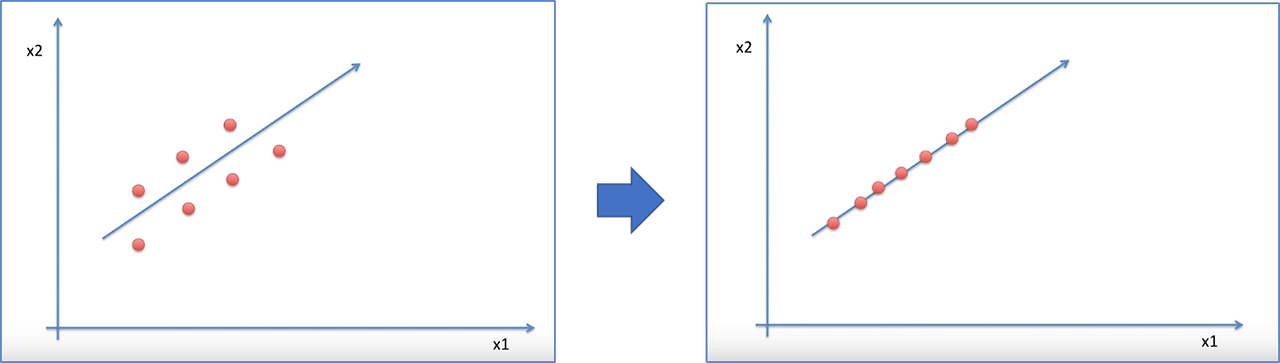

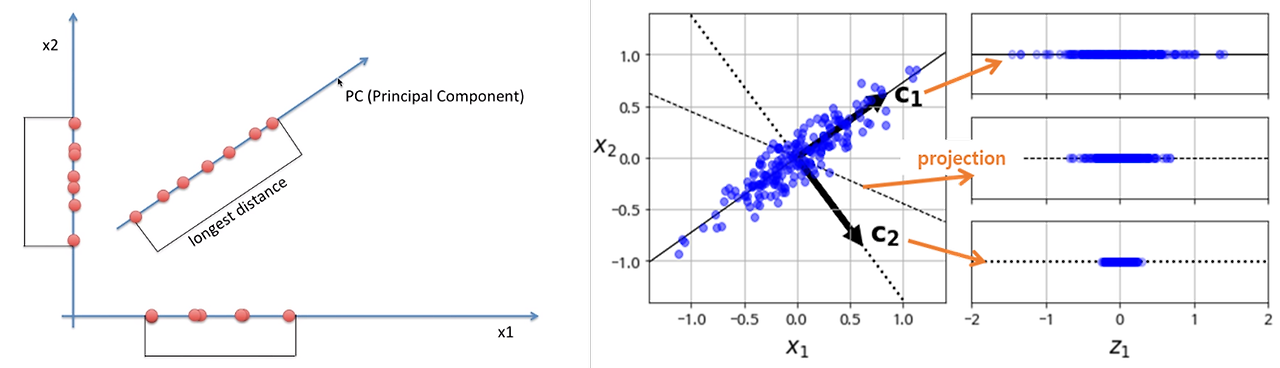

In [21]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


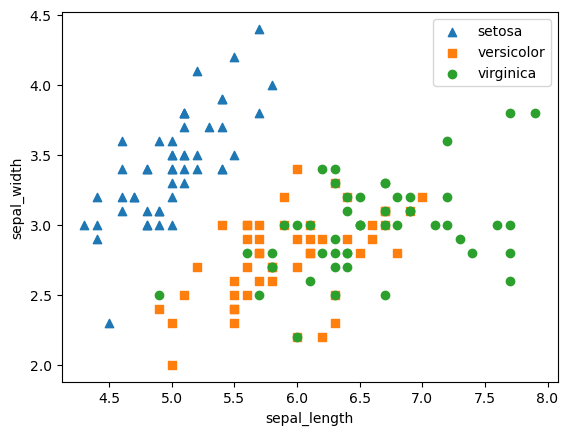

In [22]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()
#setosa는 width가 3보다 크고, length가 6보다 작은 곳에 일정하게 분포가 되어 있다. 
#하지만, versicolor와 virginica는 분류가 어렵다.

In [23]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])
# target 값을 제외하고 scaling 시켜준다.

In [24]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca)

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

In [25]:
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


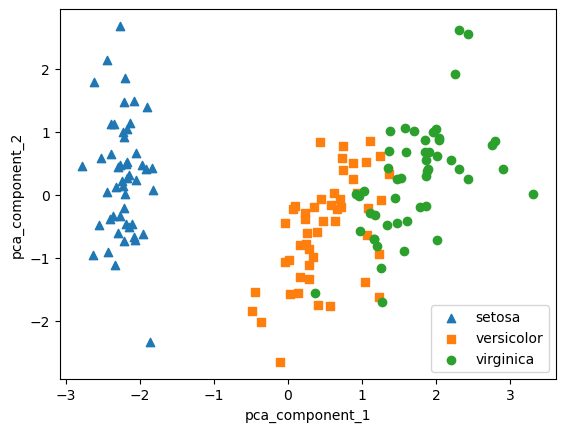

In [26]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [27]:
print(pca.explained_variance_ratio_) # 개별 컴포넌트별로 차지하는 변동성 비율을 제공하고 있다. pca_component_1이 72.9 2가 22.8이다.

[0.72962445 0.22850762]


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)

[0.98 0.94 0.96]


In [29]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)

[0.88 0.88 0.88]


- **credit card 데이터세트 PCA 변환** 

In [30]:
import pandas as pd
df=pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [31]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [32]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

<Axes: >

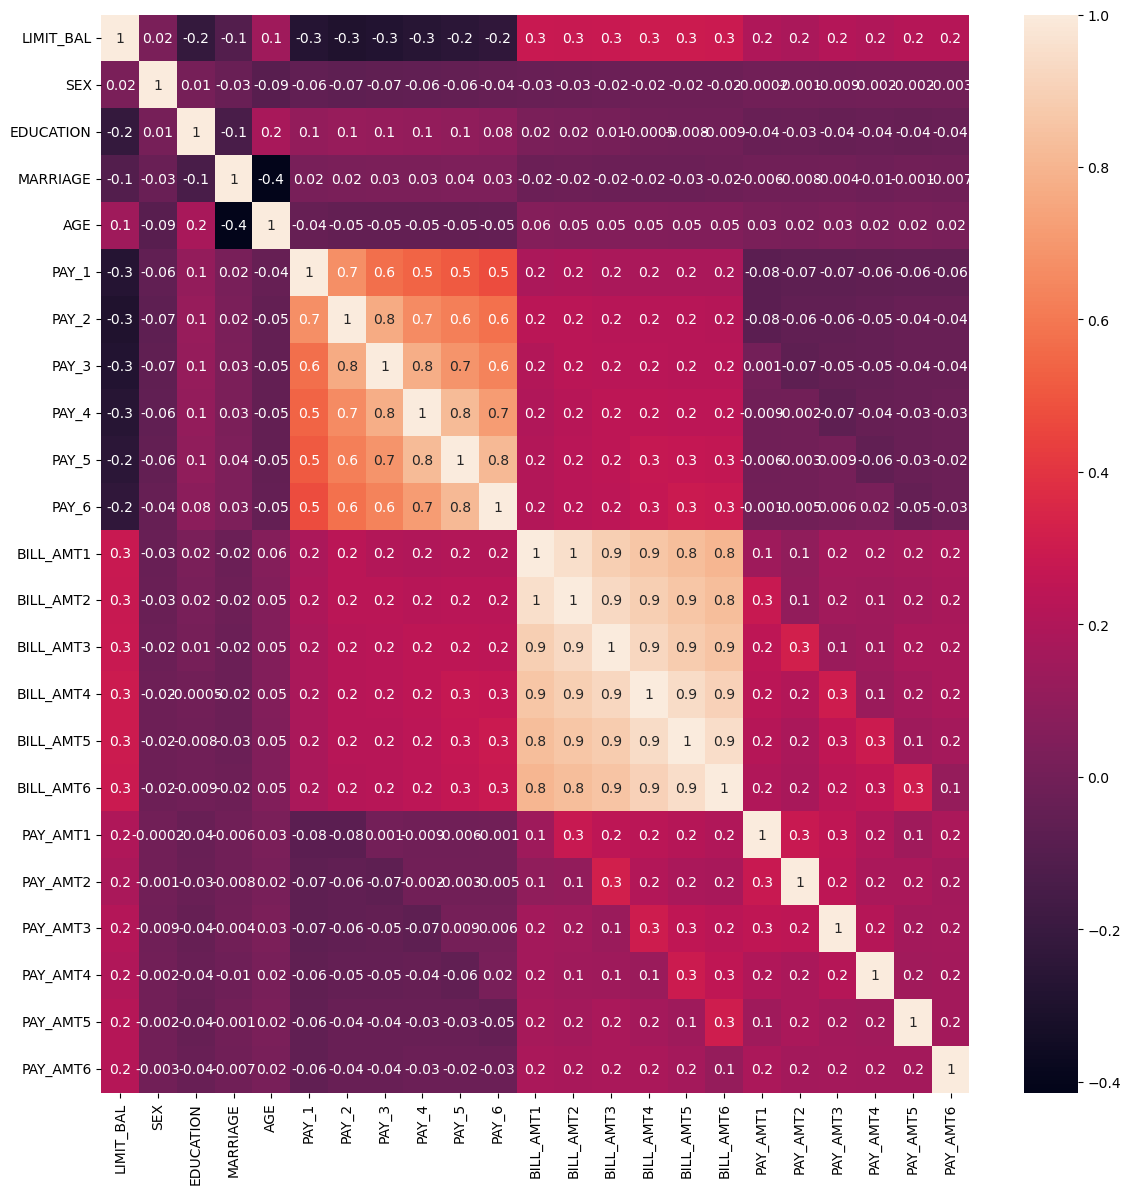

In [33]:
# correlation을 나타내는 heatmap을 통해 칼럼끼리의 상관도를 분석한다.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')
# 상관도가 매우 높은 것을 알 수 있다. 색들이 전반적으로 보라계열

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill=['BILL_AMT'+str(i) for i in range(1,7)] #BILL_AMT1, BILL_AMT2, BILL_AMT3,... BILL_AMT7
print('대상 속성명: ', cols_bill)

scaler=StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2) # 2개로 변환한다.
pca.fit(df_cols_scaled)

print('PCA Component별 변동성: ', pca.explained_variance_ratio_)

대상 속성명:  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성:  [0.90555253 0.0509867 ]


In [35]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도: {0: .4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:  0.8170


In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

pca=PCA(n_components=6) # PCA 6차원.
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 셋 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))
# PCA 컴포넌트가 6개로 전체 속성의 1/4 수준이지만, 1~2%의 미비한 성능저하를 보여준다. 뛰어난 압축성능을 보여준다.

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.793  0.7967 0.8027]
PCA 변환 데이터 셋 평균 정확도: 0.7975
